In [5]:
# ライブラリのインストール（必要に応じて）
!pip install networkx matplotlib pandas

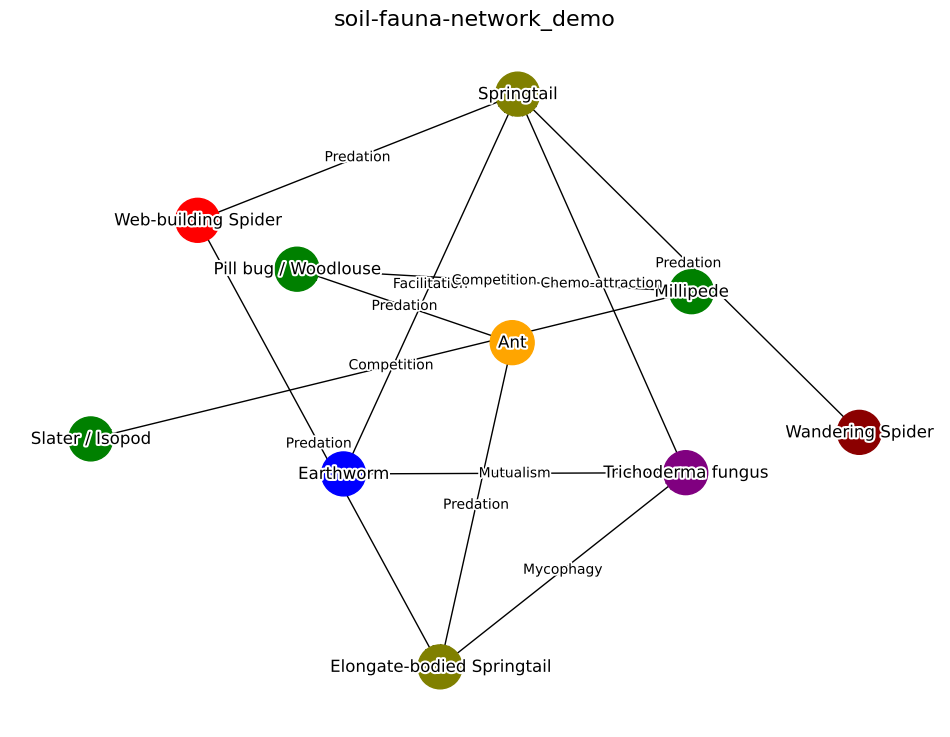

In [12]:
# ライブラリ読み込み
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects


# species.csv と interaction.csv の読み込み
species_df = pd.read_csv("species.csv")
interaction_df = pd.read_csv("interaction.csv")

# ネットワーク初期化（有向グラフ）
G = nx.DiGraph()

# ノード追加：IDとラベル・機能的役割を属性に持たせる
for _, row in species_df.iterrows():
    G.add_node(row["id"], label=row["common_name"], role=row["functional_role"])

# エッジ追加：source_id → target_id にラベル（relation_type）を付与
for _, row in interaction_df.iterrows():
    G.add_edge(row["source_id"], row["target_id"], label=row["relation_type_en"])

# ノードの色分け（role別に簡易マッピング）
role_colors = {
    "分解者": "green",
    "分解者／菌食": "olive",
    "捕食者／エンジニア": "orange",
    "捕食者（網）": "red",
    "捕食者（徘徊）": "darkred",
    "土壌改良者": "blue",
    "菌類（分解・共生）": "purple"
}
node_colors = [role_colors.get(G.nodes[n]["role"], "gray") for n in G.nodes]

# 描画（spring_layoutで自然配置）
plt.figure(figsize=(12, 9))
pos = nx.spring_layout(G, k=1.6, seed=42)

# ノードとエッジ描画
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=1000)
nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=15)

# ✅ ノードラベル（白フチ付き）
for node, (x, y) in pos.items():
    label = G.nodes[node]["label"]
    text = plt.text(x, y, label,
                    fontsize=12,
                    ha='center', va='center',
                    fontfamily='Meiryo',
                    color='black')
    text.set_path_effects([
        path_effects.Stroke(linewidth=3, foreground='white'),
        path_effects.Normal()
    ])

# ✅ エッジラベル（白フチ付き）
for (u, v, data) in G.edges(data=True):
    label = data.get("label", "")
    (x1, y1) = pos[u]
    (x2, y2) = pos[v]
    x, y = (x1 + x2) / 2, (y1 + y2) / 2  # エッジの中点
    text = plt.text(x, y, label,
                    fontsize=10,
                    ha='center', va='center',
                    fontfamily='Meiryo',
                    color='black')
    text.set_path_effects([
        path_effects.Stroke(linewidth=2.5, foreground='white'),
        path_effects.Normal()
    ])

plt.title("soil-fauna-network_demo", fontsize=16)
plt.axis("off")
plt.show()
